## Problem Statement

### How company like inshorts delivers news in less than 60 words?
 - These companies used NLP algorithms which help in extracting the most relevant sentences from a longer text. These algorithms can identify key phrases and sentences that contain the essential information of the article.

 - This technique involves selecting important sentences or phrases directly from the original text. Tools like TextRank or BERT can be used to rank the sentences and pick the most informative ones.

- Since we are learning the basic, we will go with LSTM to train our model.


### Reading the datasets


In [1]:
!gdown 1sui9RXxVsPDa4s2kooQwRGhb8taZhcgD
!gdown 1H3gdo7SLBiWE_GGD6_xcdAp2wJJFcd5L

Downloading...
From: https://drive.google.com/uc?id=1sui9RXxVsPDa4s2kooQwRGhb8taZhcgD
To: /content/news_summary.csv
100% 11.9M/11.9M [00:00<00:00, 37.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1H3gdo7SLBiWE_GGD6_xcdAp2wJJFcd5L
To: /content/news_summary_more.csv
100% 41.4M/41.4M [00:01<00:00, 25.4MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
summary = pd.read_csv("/content/news_summary.csv", encoding='iso-8859-1')
raw = pd.read_csv("/content/news_summary_more.csv", encoding='iso-8859-1')

In [4]:
summary.shape, raw.shape

((4514, 6), (98401, 2))

### Analysing text in summary dataset

In [5]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     4514 non-null   object
 1   date       4514 non-null   object
 2   headlines  4514 non-null   object
 3   read_more  4514 non-null   object
 4   text       4514 non-null   object
 5   ctext      4396 non-null   object
dtypes: object(6)
memory usage: 211.7+ KB


In [6]:
summary.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [7]:
summary['headlines'][0], summary['headlines'][1]

('Daman & Diu revokes mandatory Rakshabandhan in offices order',
 "Malaika slams user who trolled her for 'divorcing rich man' ")

In [8]:
summary['text'][0], summary['text'][1]


('The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media.',
 'Malaika Arora slammed an Instagram user who trolled her for "divorcing a rich man" and "having fun with the alimony". "Her life now is all about wearing short clothes, going to gym or salon, enjoying vacation[s]," the user commented. Malaika responded, "You certainly got to get your damn facts right before spewing sh*t on me...when you know nothing about me."')

In [9]:
summary['ctext'][0], summary['ctext'][1]


('The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the Dam

1. summary["headlines"] feature contains the title for each news.
2. summary["text"] column contains summary for the corresponding article.
3. sumaary["ctext"] column contains the entire article written on the channel website.

### Analysing raw dataset

In [10]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98401 entries, 0 to 98400
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  98401 non-null  object
 1   text       98401 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [11]:
raw.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [12]:
raw['headlines'][0], raw['headlines'][1]

('upGrad learner switches to career in ML & Al with 90% salary hike',
 'Delhi techie wins free food from Swiggy for one year on CRED')

In [13]:
raw['text'][0], raw['text'][1]


("Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.",
 "Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.")

This dataset is similar to summary dataset.

1. raw["headlines"] feature contains the title for each news.
2. raw["text"] column contains summary for the corresponding article.

### Renaming headlines column as summary and keeping only important features (headlines and summary) from summary dataset.

In [14]:
raw = raw.rename(columns = {'headlines':'summary'})
summary = summary[['headlines', 'text']].rename(columns={'headlines':'summary'})

raw.head()

,summary,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [15]:
summary.head()

,summary,text
0,Daman & Diu revokes mandatory Rakshabandhan in...,The Administration of Union Territory Daman an...
1,Malaika slams user who trolled her for 'divorc...,Malaika Arora slammed an Instagram user who tr...
2,'Virgin' now corrected to 'Unmarried' in IGIMS...,The Indira Gandhi Institute of Medical Science...
3,Aaj aapne pakad liya: LeT man Dujana before be...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Hotel staff to get training to spot signs of s...,Hotels in Maharashtra will train their staff t...


#### Concatnating both the datasets

In [16]:
# Concatenate the summary and the raw files
df = pd.concat([raw, summary]).reset_index(drop=True) #vertical concatnation
df.shape

(102915, 2)

In [17]:
df.sample(10)

,summary,text
43333,Don't mind joining politics if they don't chan...,Kangana Ranaut has said she doesn't mind enter...
37903,Maharashtra CM visits Virgin Hyperloop One tes...,Maharashtra CM Devendra Fadnavis visited one o...
12761,CBI files FIR against its 2nd top officer for ...,The CBI has filed an FIR against its Special D...
52208,Indian Army chief's comments unconstructive: C...,After Indian Army chief General Bipin Rawat sa...
54818,Chess champ not defending title in Saudi over ...,Ukrainian double world chess champion Anna Muz...
94800,"7,615 Indians lodged in foreign jails: Govt","As many as 7,615 Indian nationals are lodged i..."
7239,Usman Khawaja takes one-handed diving catch to...,Australia's Usman Khawaja pulled off a one-han...
100688,UK doctors find 27 contact lenses stuck in wom...,UK doctors have found 27 contact lenses stuck ...
89047,'Best preserved dinosaur fossil' goes on displ...,"A 110-million-year-old fossil, described as ""t..."
31270,3 RJD men returning from Lalu's son's wedding ...,Three RJD leaders returning from party supremo...


In [18]:
random_number = np.random.randint(1, 102000)

df['summary'][random_number], df['text'][random_number]

('Raj Babbar injured in police action in UP: Congress',
 "Congress on Monday informed Rajya Sabha that Raj Babbar has been injured in police action against villagers protesting demolition of their houses in Uttar Pradesh. They added that due to the injuries, he was unable to attend the Parliament proceedings. The house's Deputy Chairman dismissed the issue of Babbar's safety and security saying the state government should deal with this.")

### Distribution of words

In [19]:
df['summary'][0], df['summary'][1], df['summary'][2]

('upGrad learner switches to career in ML & Al with 90% salary hike',
 'Delhi techie wins free food from Swiggy for one year on CRED',
 "New Zealand end Rohit Sharma-led India's 12-match winning streak")

In [20]:
df['summary'].str.split().map(lambda x: len(x))


0         13
1         12
2          9
3          9
4         13
          ..
102910     9
102911     8
102912     9
102913     9
102914    11
Name: summary, Length: 102915, dtype: int64

In [21]:
df['summary'].str.split().map(lambda x: len(x)).describe()

count    102915.000000
mean          9.542506
std           1.456780
min           1.000000
25%           9.000000
50%          10.000000
75%          10.000000
max          18.000000
Name: summary, dtype: float64

In [22]:
df['text'][0], df['text'][1], df['text'][2]

("Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.",
 "Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.",
 "New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's captaincy after 12 consecutive victories dating back to March 2018. The ma

In [23]:
df['text'].str.split().map(lambda x: len(x))


0         60
1         60
2         60
3         60
4         60
          ..
102910    60
102911    60
102912    59
102913    59
102914    60
Name: text, Length: 102915, dtype: int64

In [24]:
df['text'].str.split().map(lambda x: len(x)).describe()


count    102915.000000
mean         58.240674
std           2.381301
min           1.000000
25%          57.000000
50%          59.000000
75%          60.000000
max          91.000000
Name: text, dtype: float64

On an average a summary contains 10 words whereas entire text contains 59-50 words

### Plotting the graph

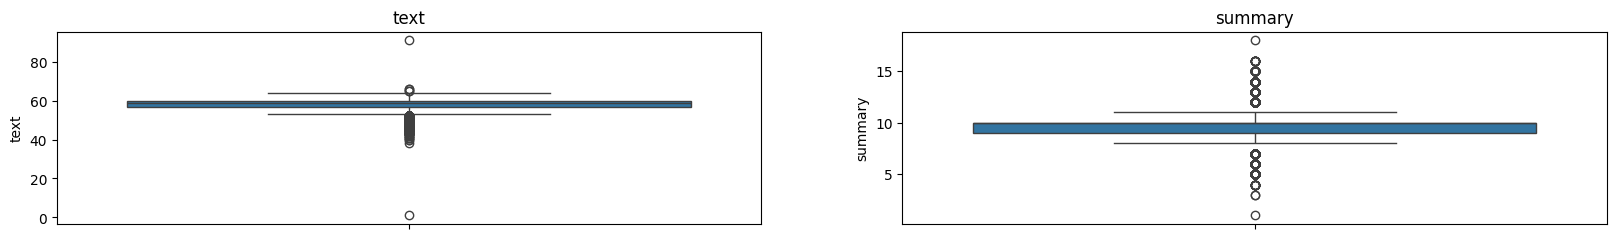

In [25]:
fig, ax =plt.subplots(1,2, figsize=(20,2.5))
sns.boxplot(raw.text.str.split().str.len(), ax=ax[0])
ax[0].set_title('text')
sns.boxplot(raw.summary.str.split().str.len(), ax=ax[1])
ax[1].set_title('summary')

fig.show()

### Both the columns contain many outliers

### Removing rows where the no of words does not lies in the range of 40 to 60.

In [26]:
# Setup some configuration parameters

config = {'min_text_len':40,
          'max_text_len':60,
          'max_summary_len':30,
          'latent_dim' : 300,
          'embedding_dim' : 200}

print(f'Before filtering: {raw.shape}')
df = df.loc[((df['text'].str.split(" ").str.len()>config['min_text_len'])
               &(df['text'].str.split(" ").str.len()<config['max_text_len']))].reset_index(drop=True)
print(f'After filtering: {df.shape}')

Before filtering: (98401, 2)
After filtering: (54572, 2)


### Distribution of wrods after filtering

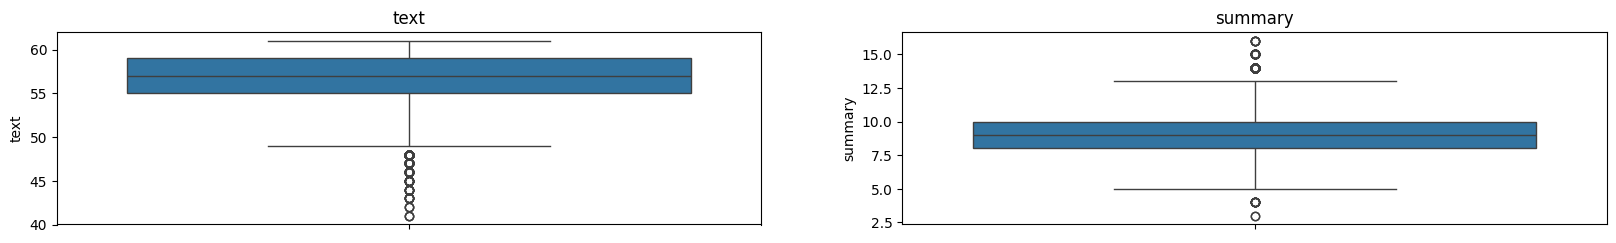

In [27]:
fig, ax =plt.subplots(1,2, figsize=(20,2.5))
sns.boxplot(df.text.str.split().str.len(), ax=ax[0])
ax[0].set_title('text')
sns.boxplot(df.summary.str.split().str.len(), ax=ax[1])
ax[1].set_title('summary')

fig.show()

### A sample

In [28]:
ran_num = np.random.randint(1, 10000)
print(f"Text: {df['text'][ran_num]}")
print()
print(f"Summary: {df['summary'][ran_num]}")
print()
print(f"Text length: {len(df['text'][ran_num].split())}")
print(f"Summary length: {len(df['summary'].str.split()[1])}")


Text: A South Korean court on Friday sentenced former President Lee Myung-bak to 15 years in prison for corruption. He was found guilty of embezzlement, abuse of power and receiving illegal funds from Samsung Electronics in return for presidential pardon of its Chairman Lee Kun-hee. Myung-bak has denied any wrongdoing and claimed that the charges are politically motivated. 

Summary: Ex-S Korea President Lee jailed for 15 years over corruption

Text length: 57
Summary length: 13


### Training a model using LSTM

1. Problem with SimpleRNN
- 2 reasons why using Vanilla RNN is not recommended

<b>1) Vanishing and Exploding gradients</b>
<b>

2) Long Term dependencies</b>

## What is Long Term dependencies?

For the sake of understanding let's assume that we are performing a next word prediction task given the previous words.
<br>

<b>Sentence:</b>
I visited <font color='blue'><b>Paris</b></font> last year during winter as a part of the business trip. For the first 2 days I suferred from jet lag and stayed at hotel near my office location. The weather was too cold for someone from a subcontinent. The trip lasted for 2 weeks and I travelled by metro for the most of my commute as the city is well connected. They were quite a lot of market area for shopping to buy souvenirs too. During the weekend I even got a chance to see the <font color='blue'><b>Eiffel tower</b></font>.

In the above example to complete the last word <b>Eiffel tower</b>, the location <b>Paris</b> mentioned at the 3rd words in the sentence had to be retained to be able to make the right prediction. This is called long term dependencies


## What kind of problem is it?

* <b>Many to Many:</b> From the problem statement we can understand that it has multiple input and output, so it's a many to many problem.

## Which architecture works well for this?

* <b>Encoder Decoder:</b> Since the input and the output lengths are not the same we will use the Encoder Decoder architecture

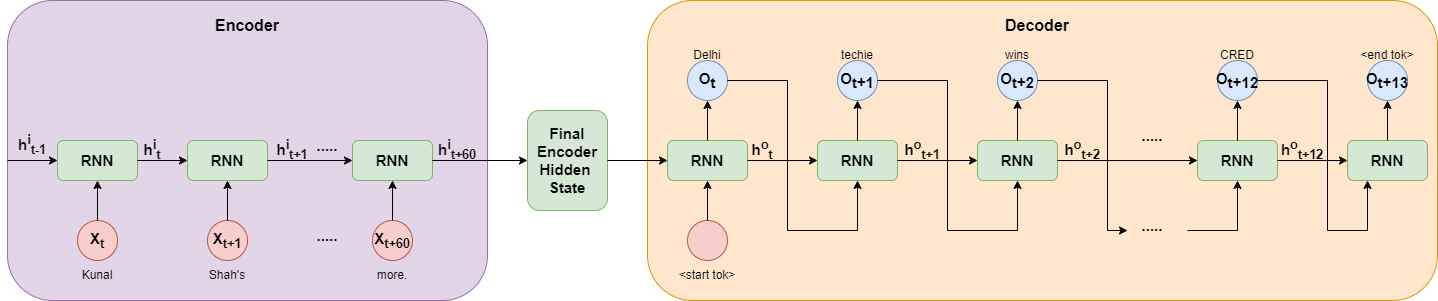

* <b>The bottle-neck at Final Encoder Hidden state</b>:
<br>
> As we can see from the architecture the entire inputs at the encoder has to be retained by the <b>final encoder hidden state</b>.
<br>
> This also means that the context of the words at the begining of the sentence would be retained compared to the words at the begining of the sentence

### Explanantion of encoder and decoder architecture



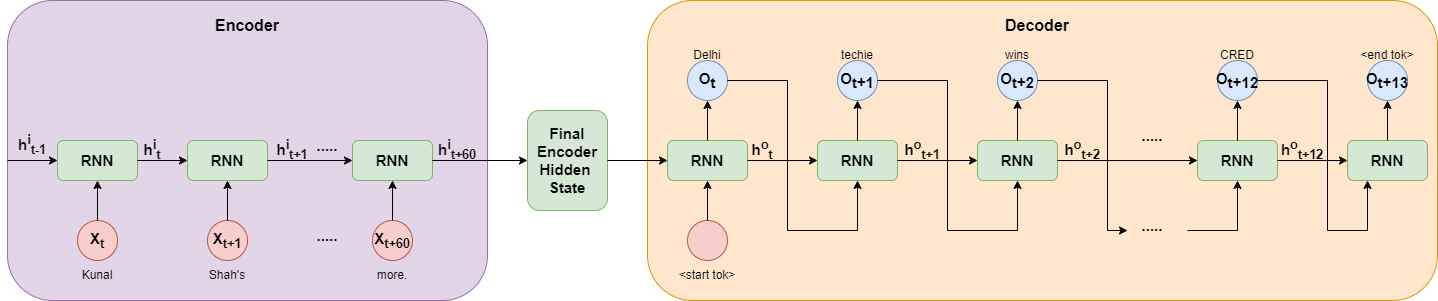

1. The encoder's role is to process the input sequence and summarize the information into a context vector (also known as a thought vector). The encoder takes each element of the input sequence one at a time and updates its hidden state.

- Input: A sequence of vectors (e.g., word embeddings of a sentence).
- Output: A context vector that encapsulates information from the entire input sequence.

#### Workflow of encoder:

1. The encoder reads the input sequence one token at a time.
2. For each token, the encoder updates its hidden state.
3. After processing the entire input sequence, the final hidden state(s) of the encoder serve as the context vector.


2. The decoder uses the context vector produced by the encoder to generate the output sequence. It generates the output sequence one token at a time, often with the help of the previous token generated by the decoder.

Input: The context vector from the encoder, and (during training) the previous target token.
Output: A sequence of vectors representing the predicted output sequence.

#### Workflow of decoder:

1. The decoder receives the context vector as its initial hidden state.
2. At each step, the decoder generates an output token and updates its hidden state.
3. This process continues until the entire output sequence is generated.

### For Example

I like to travel and I visited <font color='blue'><b>Paris</b></font> last year as a part of my business trip. It was winter season and too cold for someone from the sub-continent. I stayed at Hilton hotel and I was fortunate enough to get a room where from my window I could see the <font color='blue'><b>Eiffel tower</b></font>.

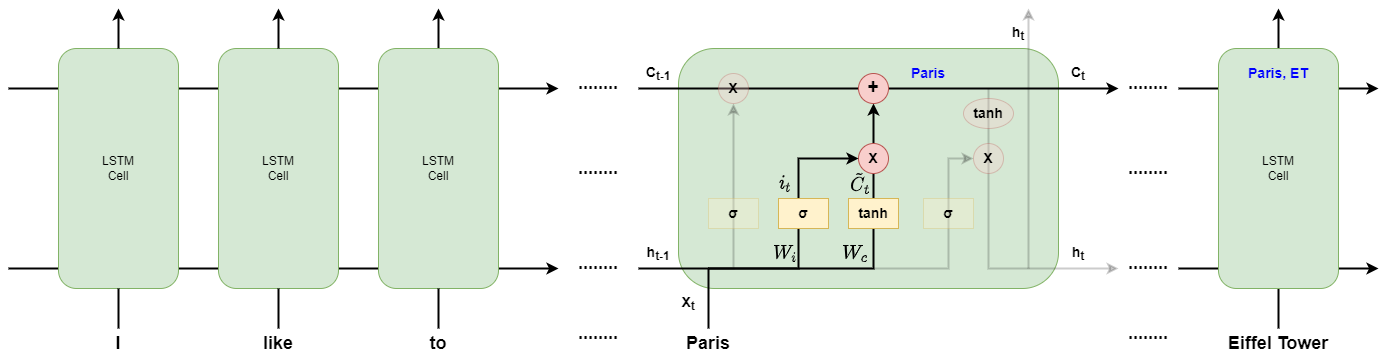

### Code Implementation with LSTM encoder and decoder

In [29]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Embedding, LSTM, Dense, Input, InputLayer, TimeDistributed
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split

import string, re

import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus
nltk.download('stopwords')

# Access the stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Cleaning

In [31]:
# Remove non-alphabetic characters (Data Cleaning)
def text_strip(sentence):

  sentence = re.sub("(\\t)", " ", str(sentence)).lower()
  sentence = re.sub("(\\r)", " ", str(sentence)).lower()
  sentence = re.sub("(\\n)", " ", str(sentence)).lower()

  # Remove - if it occurs more than one time consecutively
  sentence = re.sub("(--+)", " ", str(sentence)).lower()

  # Remove . if it occurs more than one time consecutively
  sentence = re.sub("(\.\.+)", " ", str(sentence)).lower()

  # Remove the characters - <>()|&©ø"',;?~*! (special charcter)
  sentence = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", " ", str(sentence)).lower()

  # Remove \x9* in text
  sentence = re.sub(r"(\\x9\d)", " ", str(sentence)).lower()

  # Replace CM# and CHG# to CM_NUM
  sentence = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", "CM_NUM", str(sentence)).lower()

  # Remove punctuations at the end of a word
  sentence = re.sub("(\.\s+)", " ", str(sentence)).lower()
  sentence = re.sub("(\-\s+)", " ", str(sentence)).lower()
  sentence = re.sub("(\:\s+)", " ", str(sentence)).lower()

  # Remove multiple spaces
  sentence = re.sub("(\s+)", " ", str(sentence)).lower()

  return sentence

### Preprocessing the "text" and "summary" column and introducing starting and ending tokens in "summary" column.

In [32]:
df['cleaned_text'] = df.text.apply(lambda x: text_strip(x))
df['cleaned_summary'] = df.summary.apply(lambda x: '_START_ '+ text_strip(x) + ' _END_')
df['cleaned_summary'] = df['cleaned_summary'].apply(lambda x: 'sostok ' + x + ' eostok')
df.sample(10)

,summary,text,cleaned_text,cleaned_summary
40453,'Shape of You' most watched int'l video on You...,Grammy Award winning singer Ed Sheeran's 'Shap...,grammy award winning singer ed sheeran s shape...,sostok _START_ shape of you most watched int ...
31715,TMC leader threatens to break legs of oppositi...,"Alleging that they were playing ""dirty politic...",alleging that they were playing dirty politics...,sostok _START_ tmc leader threatens to break l...
48822,Throwback and there's throw way way back: Joha...,Filmmaker Karan Johar took to Instagram to sha...,filmmaker karan johar took to instagram to sha...,sostok _START_ throwback and there s throw way...
26367,India defeats Pakistan to win Blind Cricket Wo...,India defeated Pakistan by two wickets on Satu...,india defeated pakistan by two wickets on satu...,sostok _START_ india defeats pakistan to win b...
29756,North Korea agrees to communicate regularly wi...,North Korea has agreed to communicate regularl...,north korea has agreed to communicate regularl...,sostok _START_ north korea agrees to communica...
8469,"BJP forgot two Gods, namely voter and farmer: ...","Claiming the ""two Gods"" are the farmer and the...",claiming the two gods are the farmer and the v...,sostok _START_ bjp forgot two gods namely vote...
52616,India's first Food Truck Park opens in Mumbai,India's first Food Truck Park has opened in Ba...,india s first food truck park has opened in ba...,sostok _START_ india s first food truck park o...
51291,Anti-Romeo squads must not trouble consenting ...,"Uttar Pradesh Chief Minister Yogi Adityanath, ...",uttar pradesh chief minister yogi adityanath d...,sostok _START_ anti-romeo squads must not trou...
11905,Body of newborn with paper stuffed in mouth fo...,The body of a newborn was found with toilet pa...,the body of a newborn was found with toilet pa...,sostok _START_ body of newborn with paper stuf...
51995,Trailer of Vikram Bhatt's horror web series 'G...,The trailer for the horror web series 'Gehraiy...,the trailer for the horror web series gehraiya...,sostok _START_ trailer of vikram bhatt s horro...


In [33]:
print(df.shape)

df = df[((df.cleaned_text.str.split().str.len()<=config['max_text_len']) &
                (df.summary.str.split().str.len()<=(config['max_summary_len']+4)))].copy()
df = df.reset_index(drop=True)
print(df.shape)


#removing text & summary columns from the dataframe df and replacing them with cleaned_text and cleaned_summary respective
df = df.drop(['text', 'summary'], axis=1)
df = df.rename(columns = {'cleaned_text':'text',
                                      'cleaned_summary':'summary'})
df.sample(5)

(54572, 4)
(47500, 4)


,text,summary
3203,a signed jersey donated by current captain vir...,sostok _START_ kohli honoured by bradman museu...
7907,mumbai-based drone startup droni tech raised ã...,sostok _START_ mumbai-based drone startup rais...
41706,members of a group called the arekatika porata...,sostok _START_ complaint against baahubali 2 d...
17040,as many as 7.14 lakh candidates have cleared t...,sostok _START_ most number of successful neet ...
12741,south africa-born former england captain kevin...,sostok _START_ foreign player to deliver patau...


### Now this content is preprocessing i.e. it does not contain special characters, all the letters are small and distribution of space is also even.


### Spliting the data into X and y and then train and test data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['summary'], test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42750,) (4750,) (42750,) (4750,)


### Calculating % of words that come less than 5 times in the entire coprus

In [35]:
def get_rare_words(text_col):

  # Prepare a tokenizer on testing data
  text_tokenizer = Tokenizer()
  text_tokenizer.fit_on_texts(list(text_col))

  thresh = 5

  cnt = 0
  tot_cnt = 0

  for key, value in text_tokenizer.word_counts.items():
      tot_cnt = tot_cnt + 1
      if value < thresh:
          cnt = cnt + 1

  print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

  return cnt, tot_cnt

In [36]:
x_train_cnt, x_train_tot_cnt = get_rare_words(text_col=X_train)

% of rare words in vocabulary: 64.15386975269716


In [37]:
x_train_cnt, x_train_tot_cnt

(37641, 58673)

### Removing words that occuring less than 5 times in the entire corpus

- We are doing this because vocabulary size is very big and if these are words only 5 times that the model will not be able to learn anything.

In [38]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words=x_train_tot_cnt - x_train_cnt)
# x_tokenizer = Tokenizer(num_words = x_train_tot_cnt)

x_tokenizer.fit_on_texts(list(X_train))

# Convert text sequences to integer sequences
x_tr_seq = x_tokenizer.texts_to_sequences(X_train)
x_val_seq = x_tokenizer.texts_to_sequences(X_test)

# Pad zero upto maximum length
x_tr = pad_sequences(x_tr_seq,  maxlen=config['max_text_len'], padding='post')
x_val = pad_sequences(x_val_seq, maxlen=config['max_text_len'], padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 21033


In [39]:
X_train[0]

'pakistani singer rahat fateh ali khan has denied receiving any notice from the enforcement directorate over allegedly smuggling foreign currency out of india it would have been better if the authorities would have served the notice first if any and then publicised this reads a press release issued on behalf of rahat the statement further called the allegation bizarre .'

In [40]:
x_tr[0].shape, x_tr[0]

((60,),
 array([    3,   106,     9,    29,   843,   434,  1253,     5,   863,
           22,     1,   288,  5381,   853,  1223,     4,   464,     8,
        12005,    15,  3360,     3,  3647,    90,    18, 11446,     6,
        15980,     3,   653,  1231,     4,    24,     1,    46,    30,
          156,     1,   105,    20, 12006,    18,  3820,  5920,    12,
           11,    17,   488,   202,     1,  8957,   670,     2,   200,
         1489,     5,   136,    19,  2301,     0], dtype=int32))

In [41]:
x_tr[1]

array([    1,   662,     7,   118,   156,     1,  2184,   105,     4,
           1,   602,    31,    56,  1309,  3861,  2487,  1320,  2336,
          19,     1, 10174,     5,   901,     1,   194,   105,     4,
           1,   162, 15981,  2488,    13,  3138,   190,     1,  3950,
        2336,    11,   119,   324,  1210,  2488,    28,   123, 11447,
           1,  4380,  2131,    10, 15982,     1,  1320,     6,  1240,
        2489,     2,   109,   105,  1994,     0], dtype=int32)

### Tokenize the validation dataset

In [42]:
y_train_cnt, y_train_tot_cnt = get_rare_words(text_col=y_train)

% of rare words in vocabulary: 66.38801140303568


In [43]:
# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words=y_train_tot_cnt - y_train_cnt)
# y_tokenizer = Tokenizer(num_words=y_train_tot_cnt)
y_tokenizer.fit_on_texts(list(y_train))

# Convert text sequences to integer sequences
y_tr_seq = y_tokenizer.texts_to_sequences(y_train)
y_val_seq = y_tokenizer.texts_to_sequences(y_test)

# Pad zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=config['max_summary_len'], padding='post')
y_val = pad_sequences(y_val_seq, maxlen=config['max_summary_len'], padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 8726


# Initialize LSTM Encoder and Decoder architecture

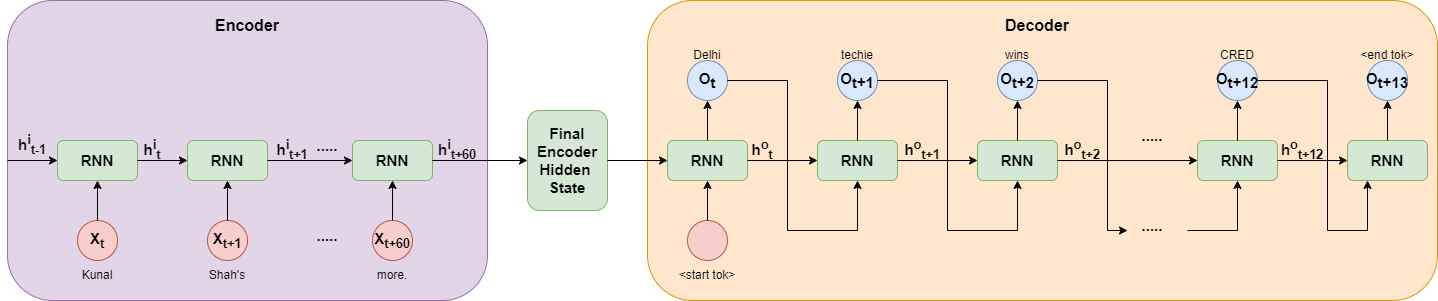

In [44]:
config = {'min_text_len':40,
          'max_text_len':60,
          'max_summary_len':30,
          'latent_dim' : 300,
          'embedding_dim' : 200}


latent_dim = config['latent_dim']
embedding_dim = config['embedding_dim']
max_text_len = config['max_text_len']
max_summary_len = config['max_summary_len']

x_voc = x_tokenizer.num_words + 1 # x_voc = 21033

# Encoder
encoder_inputs = Input(shape=(max_text_len, ))

# Embedding layer
enc_emb = Embedding(input_dim = x_voc, output_dim = embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(units = latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

#encoder_outputs is not using anywhere in the further code. Why are we using this "encoder_outputs" then? Can't we put _ instead of encoder_outputs

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, )) #why None and why decoder recieved input externally. Dont it get input from the final output of encoder

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)  #y_voc = 8726 and why input_dim here is y_voc not x_voc?
dec_emb = dec_emb_layer(decoder_inputs) #input is coming from the encoder_outputs (last time step of encoder why are we giving input as decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = decoder_lstm(dec_emb, initial_state=[state_h, state_c])
# what is decoder_fwd_state, decoder_back_state in the decoder architecture?
#maybe decoder_outputs: The full sequence of outputs from the LSTM layer for each time step.
#decoder_fwd_state: Typically the final hidden state (output) of the LSTM layer.
#decoder_back_state: Typically the final cell state of the LSTM layer.

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 60)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 60, 200)              4206600   ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 60, 300),            601200    ['embedding[0][0]']           
                              (None, 300),                                                        
                              (None, 300)]                                                        
                                                                                              

### Explanation

1. We need only encoder_output1 as input to this encoder_lstm2 becuase we are building encoder decoder model and we need only hidden state as output from each time step. See the above diagram for more clarity.

2. In LSTM layer if we make return_state=False, then only encoder_output1 will come as output.

3. hidden_state and encoder_output are kind of same and cell state is different from both of them.

4. Trainable Parameters:
- For encoder embedding layers: 200(output of embedding layer to represent word)x21033 (unique word size) so 200x21033
- For LSTM layer1: 4x(input_dimxunits+unitsxunits+units) i.e. 4*(200x300+300x300+300)
- For LSTM layer2: 4x(input_dimxunits+unitsxunits+units) i.e. 4*(300x300+300x300+300), how is it become input dimension become 300?
- For decoder embedding layers: 200(output of embedding layer to represent word)x8726 (unique word size) so 200x8726
- For LSTM decoder layer : 4x(input_dimxunits+unitsxunits+units) i.e. 4*(200x300+300x300+300) =  601200
- time_distributed : yvoc x output_from_decoder_lstm2 + yvoc i.e. 8726*300+8726

In [45]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_name = "./model.h5"

save_model = tf.keras.callbacks.ModelCheckpoint(filepath=model_name,
                                                save_weights_only=True,
                                                save_best_only=True,
                                                verbose=1)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [46]:
# #encoder model
# encoder_inputs = Input(shape=(60,))


# #word embedding with each word represented as 300 dimensions vector
# encoder_embedding = Embedding(input_dim = 21000, output_dim=300, trainable=True)(encoder_inputs)

# #All LSTM model have 300 neurons/units
# #Encoder LSTM1
# encoder_lstm_1 = LSTM(units=300, return_sequences=True,
#                       return_state=True, dropout=0.2, recurrent_dropout=0.3)

# encoder_output_1, hidden_state_1, cell_state_1 = encoder_lstm_1(encoder_embedding)

# #Encoder LSTM2
# encoder_lstm_2 = LSTM(units=300, return_sequences=True,
#                       return_state=True, dropout=0.2, recurrent_dropout=0.3)

# encoder_output_2, hidden_state_2, cell_state_2 = encoder_lstm_2(encoder_output_1)

# #Encoder LSTM3
# encoder_lstm_3 = LSTM(300, return_state=True, return_sequences=True, dropout=0.2, recurrent_dropout=0.3)

# final_encoder_output, final_encoder_hidden_state, final_encoder_cell_state = encoder_lstm_3(encoder_output_2)


# #decoder model
# decoder_inputs = Input(shape=(None,))


# #word embedding with each word represented as 300 dimensions vector
# decoder_embedding = Embedding(input_dim = 9000, output_dim=300, trainable=True)(decoder_inputs)

# #decoder LSTM1
# decoder_lstm_1 = LSTM(300, return_sequences=True, return_state=True, dropout=0.2, recurrent_dropout=0.3)
# decoder_lstm_1_output, _, _ = decoder_lstm_1(decoder_embedding, initial_state=[final_encoder_hidden_state, final_encoder_cell_state])

# #decoder LSTM2
# decoder_lstm_2 = LSTM(300, return_sequences=True, return_state=True, dropout=0.2, recurrent_dropout=0.3)
# decoder_lstm_2_output, _, _ = decoder_lstm_2(decoder_lstm_1_output)

# #Dense layer
# decoder_dense = TimeDistributed(Dense(9000, activation='softmax'))
# decoder_dense_output = decoder_dense(decoder_lstm_2_output)


# #model
# model = Model([encoder_inputs, decoder_inputs], decoder_dense_output)
# model.summary()





In [47]:
y_tr[0]

array([   3,    2,  141,   22,  818,  673, 1430,   10, 1351,    1,    4,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [48]:
y_tr[:, :-1][0]

array([   3,    2,  141,   22,  818,  673, 1430,   10, 1351,    1,    4,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [49]:
history = model.fit(
    [x_tr, y_tr[:, :-1]],
    y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
    epochs=70,
    callbacks=[es, save_model],
    batch_size=1024,
    validation_data=([x_val, y_val[:, :-1]],
                     y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]),
    )

Epoch 1/70
42/42 [==============================] - ETA: 0s - loss: 4.4761 - accuracy: 0.5833
Epoch 1: val_loss improved from inf to 2.78710, saving model to ./model.h5
42/42 [==============================] - 88s 2s/step - loss: 4.4761 - accuracy: 0.5833 - val_loss: 2.7871 - val_accuracy: 0.6205
Epoch 2/70
42/42 [==============================] - ETA: 0s - loss: 2.7469 - accuracy: 0.6207
Epoch 2: val_loss improved from 2.78710 to 2.70367, saving model to ./model.h5
42/42 [==============================] - 66s 2s/step - loss: 2.7469 - accuracy: 0.6207 - val_loss: 2.7037 - val_accuracy: 0.6270
Epoch 3/70
42/42 [==============================] - ETA: 0s - loss: 2.6106 - accuracy: 0.6532
Epoch 3: val_loss improved from 2.70367 to 2.46003, saving model to ./model.h5
42/42 [==============================] - 64s 2s/step - loss: 2.6106 - accuracy: 0.6532 - val_loss: 2.4600 - val_accuracy: 0.6926
Epoch 4/70
42/42 [==============================] - ETA: 0s - loss: 2.4653 - accuracy: 0.6909
Epoc

In [51]:
model.load_weights('./model.h5')


### Create the Decoder inference architecture

In [52]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

In [53]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq, verbose=0)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c], verbose=0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_summary_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

### Reverse encode the index to their tokens/


In [54]:
reverse_source_word_index = x_tokenizer.index_word
reverse_target_word_index = y_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [55]:
# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if (i != 0) and (i != target_word_index['sostok']) and (i != target_word_index['eostok']):
            newString = newString + reverse_target_word_index[i] + ' '

    return newString

### Prediction summary

In [56]:
actual = []
predicted = []
for i in range(0, 50):
    print ('Review:', seq2text(x_tr[i]))

    actual.append(seq2summary(y_tr[i]))
    print ('Original summary:', actual[-1])

    predicted.append(decode_sequence(x_tr[i].reshape(1, config['max_text_len'])))
    print ('Predicted summary:', predicted[-1])
    print()

prediction_df = pd.DataFrame({'Actual':actual, 'Predicted':predicted})
prediction_df.head(10)

Review: a man has been caught taking videos of girls at the school arts festival organised in kerala s thrissur by cutting a hole into his slipper and fitting a phone camera in it the police who arrested the accused after noticing his suspicious movements said that he went through the crowds trying to take photos of women from below 
Original summary: start kerala man caught taking videos on camera end 
Predicted summary:  start man arrested for raping woman in mumbai end

Review: the cbi on friday arrested the key accused in the 24 year old rss madras headquarters bomb blast from the outskirts of chennai the prime accused in the case mushtaq ahmed was absconding since the 1993 blast that claimed 11 lives ahmed had allegedly procured the explosive material for assembling the bomb and provided shelter to other accused persons 
Original summary: start cbi arrests prime accused in rss madras headquarters blast end 
Predicted summary:  start kerala cm announces ã¢ââ¹5l for free in j k end

,Actual,Predicted
0,start kerala man caught taking videos on camer...,start man arrested for raping woman in mumbai...
1,start cbi arrests prime accused in rss madras ...,start kerala cm announces ã¢ââ¹5l for free i...
2,start told me never to take a break from films...,start i m not a star in my film on my burkha ...
3,start 40 killed in us air strike on afghan isi...,start us navy kills self driving car in afgha...
4,start trailer of jennifer lawrence starrer mot...,start trailer of salman khan starrer released...
5,start student robbery steals dad s ã¢ââ¹4 lak...,start man arrested for raping minor girl in d...
6,start pcb sends legal notice to bcci for not m...,start bcci to play county cricket s cricket t...
7,start maha cm promises time bound action on de...,start govt to give up to give up to sc st act...
8,start mumbai police use dhadak reference for t...,start man who stole 150 kg of heart attack on...
9,start won t get bored when i retire from tenni...,start ronaldo scores goal in a day after bein...


### Rouge Score

What is Rouge Score?

- ROUGE, or Recall-Oriented Understudy for Gisting Evaluation, is a set of metrics and a software package used for evaluating automatic summarization and machine translation in NLP. Range of Rouge score lies between 0 and 1.

- It is basically precison, recall and f1_score for the classification problem. Instead of using accuracy score for normal ML/CNN problem we use Rouge Score for text summarization and machine translation tasks.



In [ ]:
r_score = []
rouge_pr = []
rouge_rc = []
rouge_f = []

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

for indx, data in prediction_df.iterrows():
    r_score = scorer.score(data.Actual, data.Predicted)
    pr = list(r_score['rouge1'])[0]
    rc = list(r_score['rouge1'])[1]
    fmeas = list(r_score['rouge1'])[2]

    rouge_pr.append(pr)
    rouge_rc.append(rc)
    rouge_f.append(fmeas)

prediction_df['rouge_pr'] = rouge_pr
prediction_df['rouge_rc'] = rouge_rc
prediction_df['rouge_f'] = rouge_f
prediction_df.head(10)

## Scope of Improvement

- As we can see that the predicted summary may not be perfectly good in terms of sentence formation, these are things we can try to improve it by
1. Trying with different hyperparameters like Learning rate, different optimizers, regulairization techniques, changing no of units/neurons etc
2. Stack more layers of LSTM in encoder and decoder layer
3. If the model is overfitting then stacking 5-10 layers in encoder and decoder layer then trying using GRUs. Since GRUs have lesser no of trainable parameters it can prevent overfitting.
3. Trying some complex methods like adding attention layers or use transformer based architecure like Bert.
4. As the today we can replace our architecture with Transformer or BERT.